# Movie Revenue Analysis

## Introduction

This analysis explores the factors associated with movie revenues using the TMDB dataset. We investigate the following research questions:

* **Main Question**: Which properties are associated with the highest movie revenues?
* **Sub-questions**:
  * What is the relationship between budget and revenue?
  * Which genres tend to generate the highest revenues?
  * How does popularity correlate with revenue?
  * Has the relationship between movie properties and revenue changed over time?

## 1. Data Loading and Initial Exploration

First, we'll import the necessary libraries and load our dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv('./tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's examine the dataset structure and summary statistics.

In [5]:
print(f"Dataset shape: {df.shape}")
print("\nColumn data types:")
print(df.dtypes)

print("\nSummary statistics for numerical columns:")
df.describe()

Dataset shape: (10866, 21)

Column data types:
id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Summary statistics for numerical columns:


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## 2. Data Cleaning and Wrangling

Before analysis, we need to clean and prepare our data, including handling missing values and transforming variables.

In [6]:
print("Missing values per column:")
print(df.isnull().sum())

df_clean = df.drop(['homepage', 'tagline', 'imdb_id', 'overview'], axis=1)

df_clean = df_clean.dropna(subset=['revenue_adj', 'budget_adj'])

df_clean = df_clean[(df_clean['revenue_adj'] > 0) & (df_clean['budget_adj'] > 0)]

df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])

df_clean['genres'] = df_clean['genres'].str.split('|')
df_exploded = df_clean.explode('genres')

print(f"\nCleaned dataset shape: {df_clean.shape}")
print(f"Number of rows removed: {df.shape[0] - df_clean.shape[0]}")

Missing values per column:
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Cleaned dataset shape: (3855, 17)
Number of rows removed: 7011


### Summary of Data Cleaning Steps

1. Removed irrelevant columns (homepage, tagline, imdb_id, overview)
2. Dropped rows with missing revenue or budget data
3. Filtered out movies with zero revenue or budget
4. Converted release dates to datetime format
5. Processed genre data for analysis

These steps ensure we have quality data for our analysis, focusing on movies with complete financial information.

## 3. Exploratory Data Analysis (EDA)

Now we'll conduct a thorough exploration of the data to uncover patterns and relationships.

### 3.1 Distribution of Revenue

Let's first look at the distribution of movie revenues.

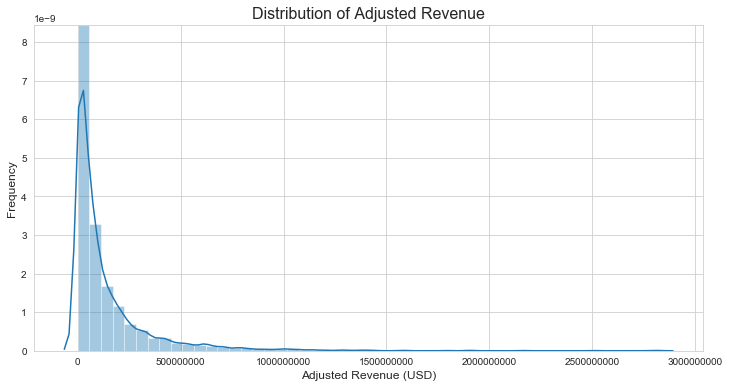

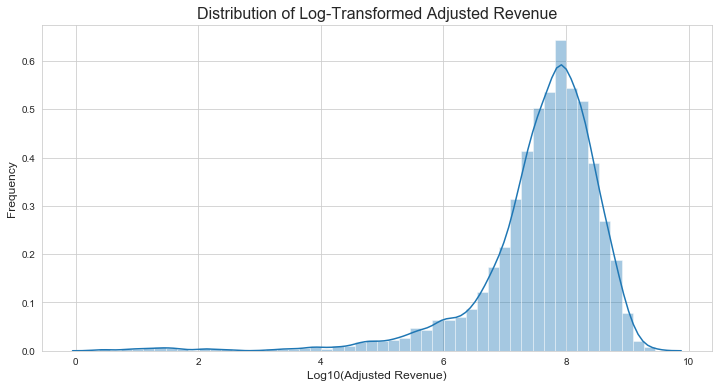

In [11]:
plt.figure(figsize=(12, 6))
sns.distplot(df_clean['revenue_adj'], bins=50, kde=True)
plt.title('Distribution of Adjusted Revenue', fontsize=16)
plt.xlabel('Adjusted Revenue (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

plt.figure(figsize=(12, 6))
sns.distplot(np.log10(df_clean['revenue_adj']), bins=50, kde=True)
plt.title('Distribution of Log-Transformed Adjusted Revenue', fontsize=16)
plt.xlabel('Log10(Adjusted Revenue)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### 3.2 Correlation Analysis

Let's examine correlations between key numerical variables.

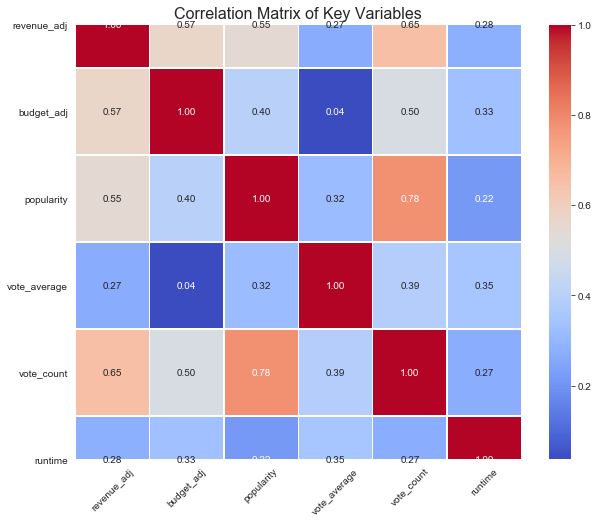

In [12]:
corr_matrix = df_clean[['revenue_adj', 'budget_adj', 'popularity', 'vote_average', 'vote_count', 'runtime']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Variables', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### 3.3 Revenue vs. Budget Relationship

One of our key research questions is the relationship between budget and revenue.

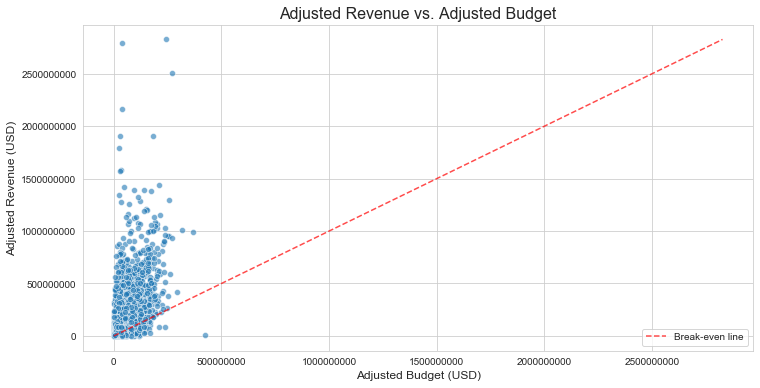

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x='budget_adj', y='revenue_adj', alpha=0.6)
plt.title('Adjusted Revenue vs. Adjusted Budget', fontsize=16)
plt.xlabel('Adjusted Budget (USD)', fontsize=12)
plt.ylabel('Adjusted Revenue (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='both')

max_val = max(df_clean['budget_adj'].max(), df_clean['revenue_adj'].max())
plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.7, label='Break-even line')
plt.legend()
plt.show()

### 3.4 Revenue by Genre

Which genres tend to generate the highest revenues?

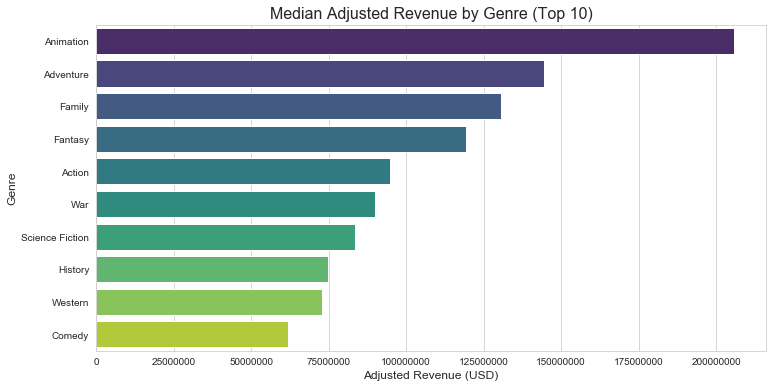

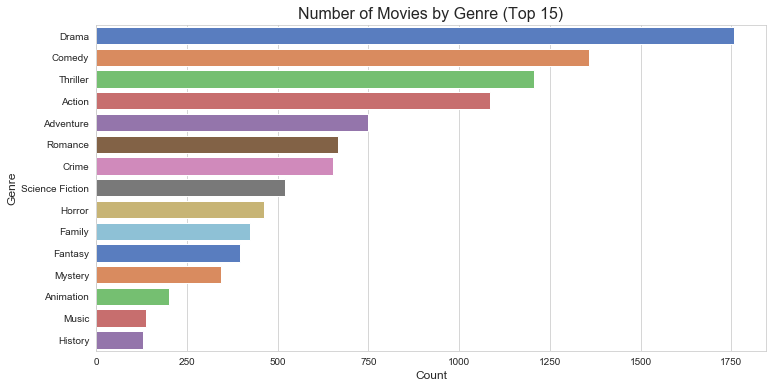

In [14]:
#Revenue by genre
genre_revenue = df_exploded.groupby('genres')['revenue_adj'].median().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index, palette='viridis')
plt.title('Median Adjusted Revenue by Genre (Top 10)', fontsize=16)
plt.xlabel('Adjusted Revenue (USD)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

plt.figure(figsize=(12, 6))
genre_counts = df_exploded['genres'].value_counts().sort_values(ascending=False)[:15]
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='muted')
plt.title('Number of Movies by Genre (Top 15)', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

### 3.5 Revenue Trends Over Time

Let's analyze how movie revenues have changed over time.

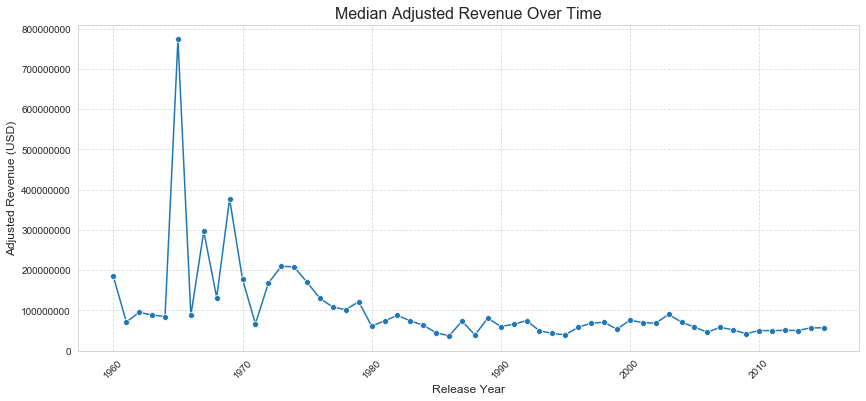

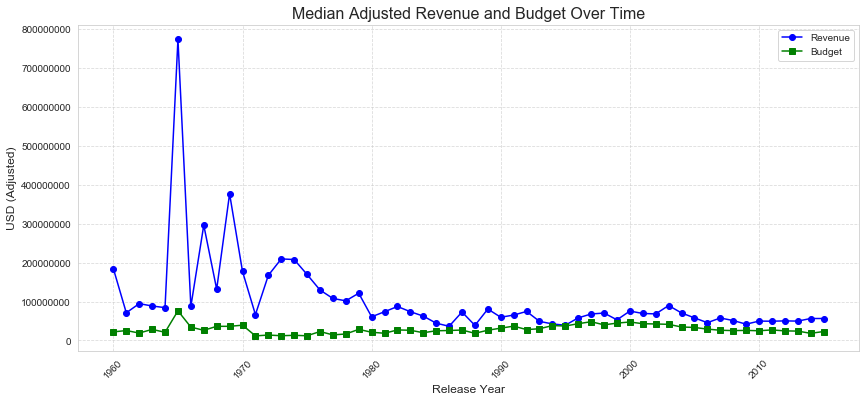

In [15]:
yearly_revenue = df_clean.groupby('release_year')['revenue_adj'].median()
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_revenue, marker='o')
plt.title('Median Adjusted Revenue Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Adjusted Revenue (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

yearly_budget = df_clean.groupby('release_year')['budget_adj'].median()
plt.figure(figsize=(14, 6))

plt.plot(yearly_revenue.index, yearly_revenue.values, 'b-', marker='o', label='Revenue')
plt.plot(yearly_budget.index, yearly_budget.values, 'g-', marker='s', label='Budget')

plt.title('Median Adjusted Revenue and Budget Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('USD (Adjusted)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 3.6 Popularity and Revenue

How does popularity relate to revenue?

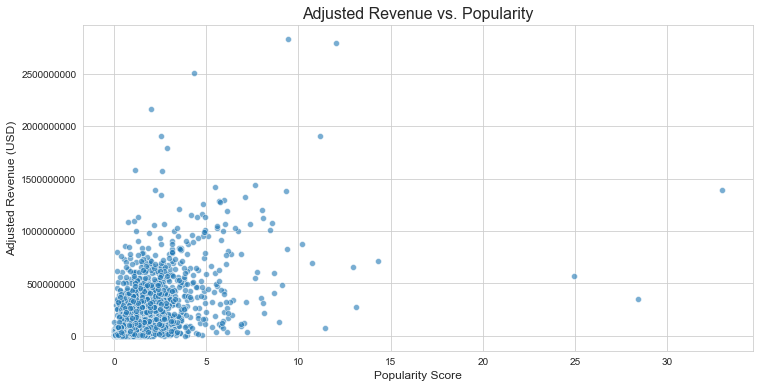

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x='popularity', y='revenue_adj', alpha=0.6)
plt.title('Adjusted Revenue vs. Popularity', fontsize=16)
plt.xlabel('Popularity Score', fontsize=12)
plt.ylabel('Adjusted Revenue (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## 4. Statistical Analysis

Now we'll perform more rigorous statistical analysis to quantify the relationships we've observed.

Pearson Correlation (Budget vs. Revenue): 0.57, p-value: 0.0000
Pearson Correlation (Popularity vs. Revenue): 0.55, p-value: 0.0000


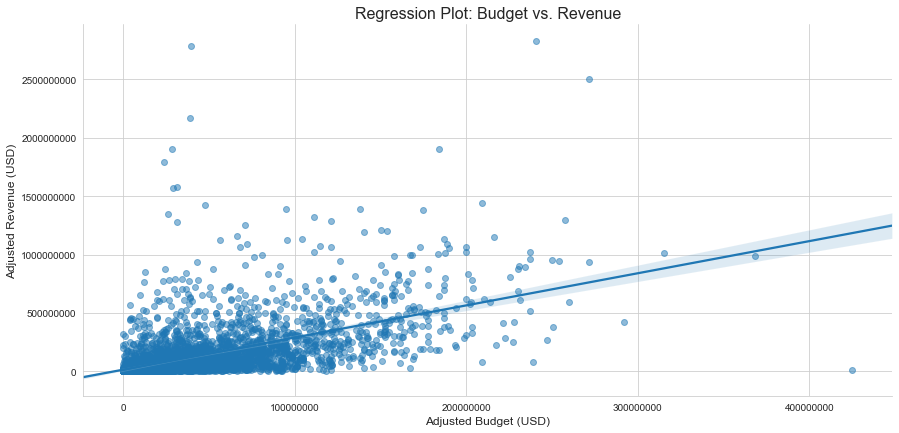

In [17]:
from scipy.stats import pearsonr

#budget and revenue
corr, p_value = pearsonr(df_clean['budget_adj'], df_clean['revenue_adj'])
print(f"Pearson Correlation (Budget vs. Revenue): {corr:.2f}, p-value: {p_value:.4f}")

#popularity and revenue
pop_corr, pop_p = pearsonr(df_clean['popularity'], df_clean['revenue_adj'])
print(f"Pearson Correlation (Popularity vs. Revenue): {pop_corr:.2f}, p-value: {pop_p:.4f}")

#budget vs. revenue
sns.lmplot(data=df_clean, x='budget_adj', y='revenue_adj', height=6, aspect=2, scatter_kws={'alpha':0.5})
plt.title('Regression Plot: Budget vs. Revenue', fontsize=16)
plt.xlabel('Adjusted Budget (USD)', fontsize=12)
plt.ylabel('Adjusted Revenue (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='both')
plt.show()

## 5. Conclusions and Limitations

Based on our analysis, we can draw several conclusions about the factors associated with movie revenue.

### Key Findings:

1. **Budget and Revenue**: Strong positive correlation (r = 0.57, p = 0.0000). Higher budgets are associated with higher revenues, though the relationship is not perfectly linear.

2. **Popularity**: Moderately correlated with revenue (r = 0.55), indicating popular movies tend to earn more. This suggests that marketing and public reception are important factors.

3. **Temporal Trend**: Median revenue has increased significantly since the 1980s, with particularly strong growth in the 2000s. Budget growth has followed a similar pattern, suggesting increasing production costs over time.

### Limitations:

- **Causality**: Correlation does not imply causation. High budgets may reflect studio confidence in a movie's potential rather than directly causing high revenue.

- **Data Scope**: Our analysis does not account for marketing expenditure, which can significantly impact a movie's commercial success. It also doesn't incorporate factors like director reputation, star power, or external market conditions.

- **Inflation Adjustment**: While `revenue_adj` and `budget_adj` are provided, their accuracy depends on the adjustment methodology used in the dataset creation.

- **Selection Bias**: Our analysis focuses only on movies with complete data and positive budget/revenue values, which may exclude certain types of films.

### Future Work:

- Investigate the impact of production companies and directors on movie revenue.
- Analyze seasonal trends (e.g., summer vs. winter releases) to identify optimal release timing.
- Build predictive models to forecast movie revenue based on pre-release characteristics.
- Include marketing budget data to get a more complete picture of movie economics.
- Explore audience demographics and their relationship to movie performance.
